In [1]:
import tensorflow as tf 

/Users/qp19/anaconda2/envs/oreillytf/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.VERSION

'1.8.0'

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import NumpyReader
tf.logging.set_verbosity(tf.logging.WARN)
tf.__version__

'1.8.0'

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})

In [6]:
#Load Air Passengers 
Passengers = pd.read_csv('AirPassengers.csv') #,index_col='month')
#Passengers.index = pd.to_datetime(Passengers.index)

In [7]:
Passengers.head()

,month,x
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [8]:
list(Passengers)

['month', 'x']

In [9]:
x = Passengers.as_matrix(columns=Passengers.columns[0:1])

In [10]:
x

array([['1/1/1949'],
       ['2/1/1949'],
       ['3/1/1949'],
       ['4/1/1949'],
       ['5/1/1949'],
       ['6/1/1949'],
       ['7/1/1949'],
       ['8/1/1949'],
       ['9/1/1949'],
       ['10/1/1949'],
       ['11/1/1949'],
       ['12/1/1949'],
       ['1/1/1950'],
       ['2/1/1950'],
       ['3/1/1950'],
       ['4/1/1950'],
       ['5/1/1950'],
       ['6/1/1950'],
       ['7/1/1950'],
       ['8/1/1950'],
       ['9/1/1950'],
       ['10/1/1950'],
       ['11/1/1950'],
       ['12/1/1950'],
       ['1/1/1951'],
       ['2/1/1951'],
       ['3/1/1951'],
       ['4/1/1951'],
       ['5/1/1951'],
       ['6/1/1951'],
       ['7/1/1951'],
       ['8/1/1951'],
       ['9/1/1951'],
       ['10/1/1951'],
       ['11/1/1951'],
       ['12/1/1951'],
       ['1/1/1952'],
       ['2/1/1952'],
       ['3/1/1952'],
       ['4/1/1952'],
       ['5/1/1952'],
       ['6/1/1952'],
       ['7/1/1952'],
       ['8/1/1952'],
       ['9/1/1952'],
       ['10/1/1952'],
       ['11/1/1952'],
  

In [11]:
y = Passengers.as_matrix(columns=Passengers.columns[1:2])

In [12]:
y

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [13]:
x = np.array(range(len(y)))

In [14]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143])

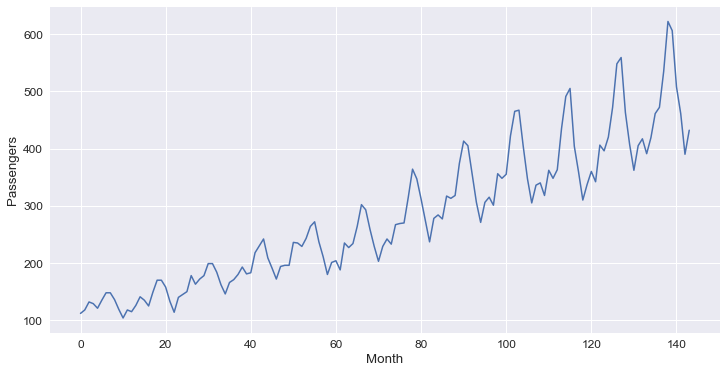

In [15]:
plt.figure(figsize=(12,6))
plt.xlabel('Month')
plt.ylabel('Passengers')
_ = plt.plot(x, y)

In [16]:
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y
}

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(
        reader, batch_size=20, window_size=30)

ar = tf.contrib.timeseries.ARRegressor(
        periodicities=20, input_window_size=20, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)

_ = ar.train(input_fn=train_input_fn, steps=600)

In [17]:
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=10)

In [48]:
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
evaluation, steps=40)))

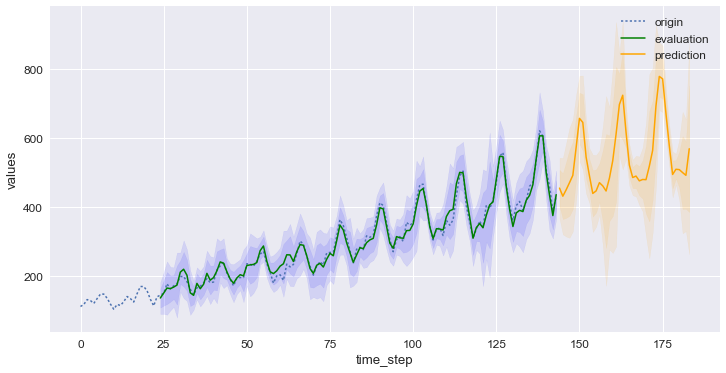

In [49]:
plt.figure(figsize=(12,6))
x = data['times'].reshape(-1)
y = data['values'].reshape(-1)
plt.plot(x, data['values'].reshape(-1), ':', label='origin')

x = evaluation['times'].reshape(-1)
y = evaluation['mean'].reshape(-1)
s = np.sqrt(evaluation['covariance'].reshape(-1))
plt.plot(x, evaluation['mean'].reshape(-1), label='evaluation', color='green')
plt.fill_between(x, y-5*s,y+5*s, alpha=0.1, color='blue')
plt.fill_between(x, y-3*s,y+3*s, alpha=0.1, color='blue')

x = predictions['times'].reshape(-1)
y = predictions['mean'].reshape(-1)
s = np.sqrt(predictions['covariance'].reshape(-1))
plt.plot(x, y, label='prediction',color='orange')
plt.fill_between(x, y-5*s,y+5*s, alpha=0.1, color='orange')
plt.fill_between(x, y-3*s,y+3*s, alpha=0.1, color='orange')

plt.xlabel('time_step')
plt.ylabel('values')
_ = plt.legend()